# Optimization of marketing costs for event ticketing platform

- In this project for event ticketing website Yandex.Afisha, I analyzed how people start buying, how much money each client brings, and when marketing costs pay off.
- In order to optimize marketing costs I calculated metrics: LTV, CAC, Retention rate, DAU, WAU, MAU, ROMI.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('/Users/yuliyapletneva/visits_log.csv')
orders = pd.read_csv('/Users/yuliyapletneva/orders_log.csv')
costs = pd.read_csv('/Users/yuliyapletneva/costs.csv')

In [3]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.columns = visits.columns.str.lower() 

In [5]:
visits = visits.rename(columns = {'end ts': 'end_ts', 'source id': 'source_id', 'start ts' : 'start_ts'})

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
orders.columns = orders.columns.str.lower() 

In [10]:
orders = orders.rename(columns = {'buy ts': 'buy_ts'})

In [11]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [13]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [14]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [15]:
visits.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

In [17]:
costs.duplicated().sum()

0

### User engagement metrics

- Calculating DAU, WAU and MAU;
- Calculating the average of these metrics over the entire period;
- Displaying changes in metrics over time on graphs.

In [18]:
visits['visit_year'] = visits['start_ts'].dt.year
visits['visit_month'] = visits['start_ts'].dt.month
visits['visit_week'] = visits['start_ts'].dt.week
visits['visit_day'] = visits['start_ts'].dt.date

<ipython-input-18-5861a24c877a>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['visit_week'] = visits['start_ts'].dt.week


In [19]:
dau_total = visits.groupby('visit_day').agg({'uid': 'nunique'}).mean()

In [20]:
wau_total = (
    visits.groupby(['visit_year', 'visit_week'])
    .agg({'uid': 'nunique'})
    .mean()
)

In [21]:
mau_total = (
    visits.groupby(['visit_year', 'visit_month'])
    .agg({'uid': 'nunique'})
    .mean()
)

In [22]:
print("DAU:", int(dau_total))
print("WAU:", int(wau_total))
print("MAU:", int(mau_total))

DAU: 907
WAU: 5716
MAU: 23228


In [23]:
dau = visits.groupby('visit_day').agg({'uid': 'nunique'})
wau = visits.groupby(['visit_year', 'visit_week']).agg({'uid': 'nunique'})
mau = visits.groupby(['visit_year', 'visit_month']).agg({'uid': 'nunique'})

In [24]:
print(dau.head(10))

            uid
visit_day      
2017-06-01  605
2017-06-02  608
2017-06-03  445
2017-06-04  476
2017-06-05  820
2017-06-06  797
2017-06-07  699
2017-06-08  868
2017-06-09  695
2017-06-10  350


In [25]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'The number of unique users per day')

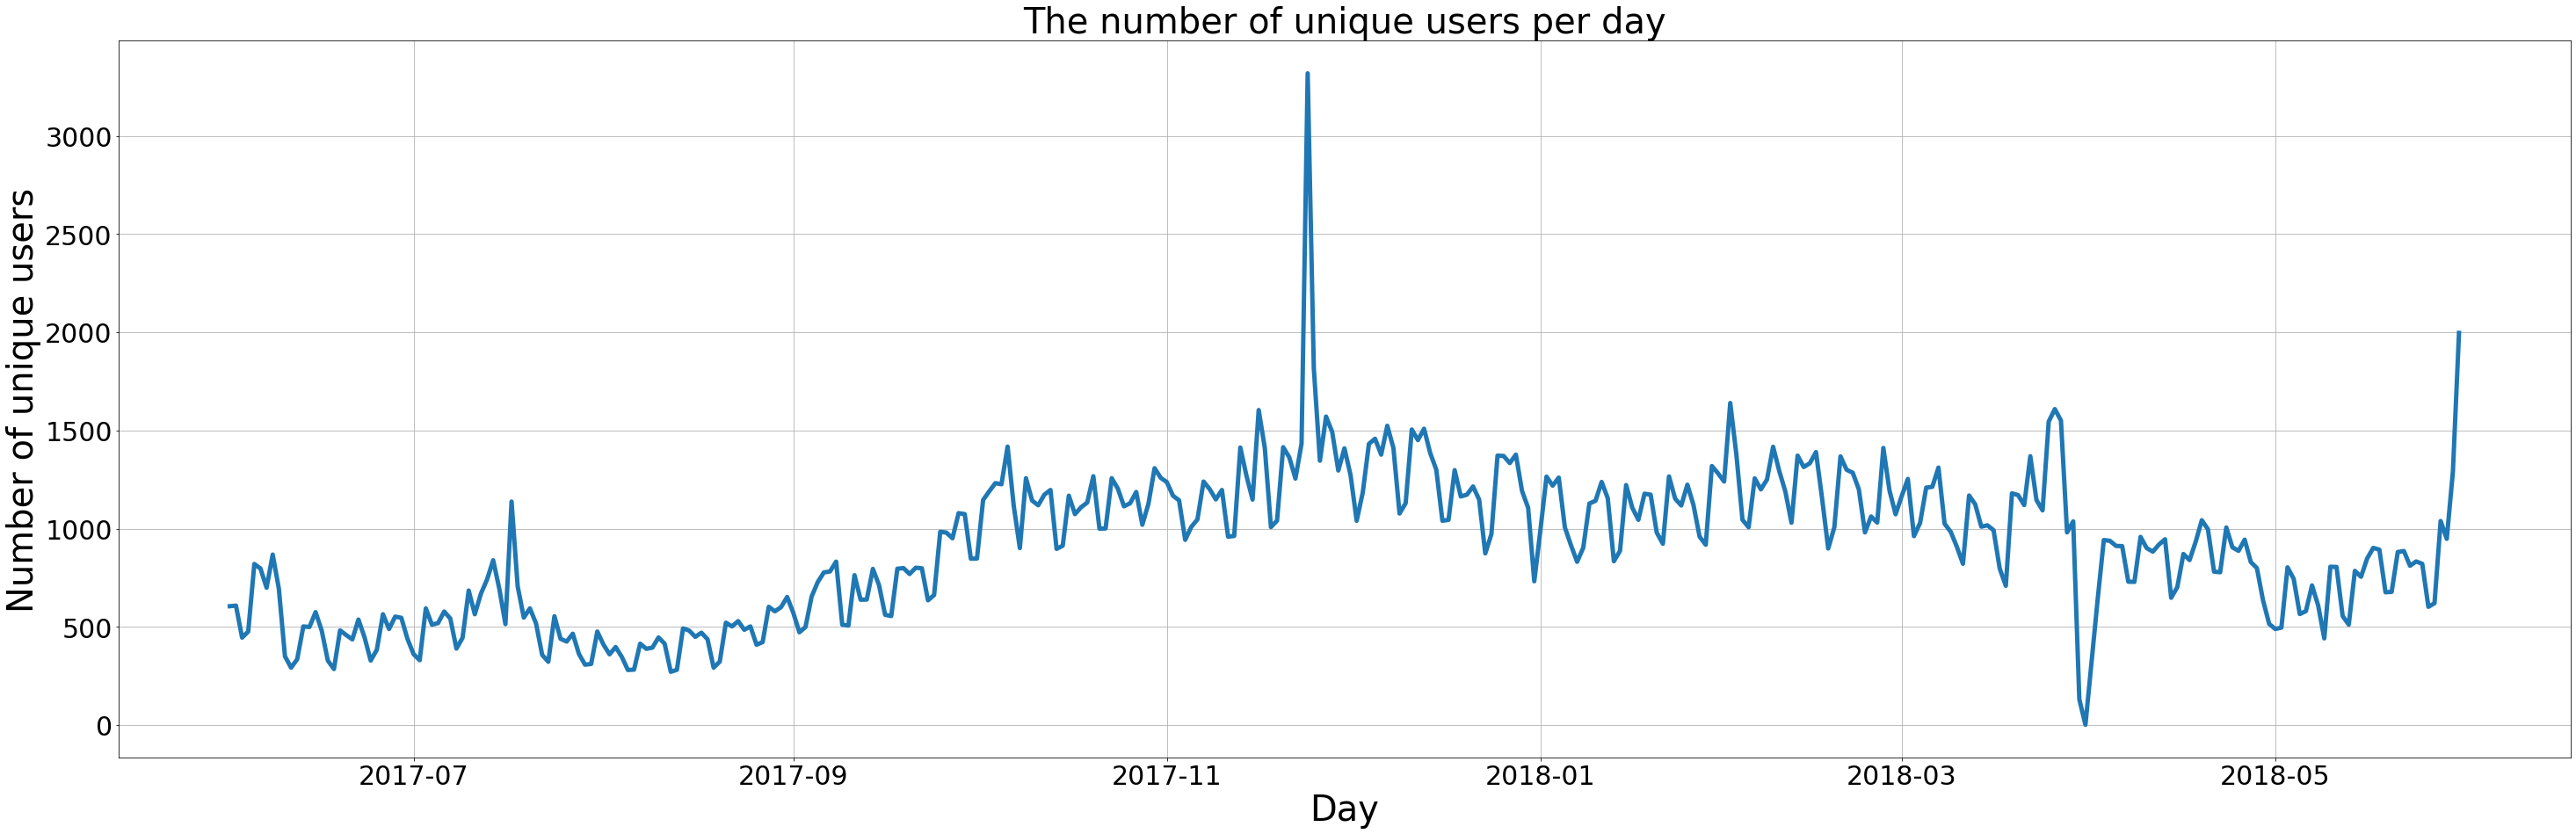

In [26]:
ax = dau.plot(grid = True, figsize = (50,15), linewidth=5, legend = False, fontsize=30)
ax.set_xlabel("Day", fontsize=40)
ax.set_ylabel("Number of unique users", fontsize=40)
ax.set_title("The number of unique users per day", fontsize=40)

Text(0.5, 1.0, 'The number of unique users per week')

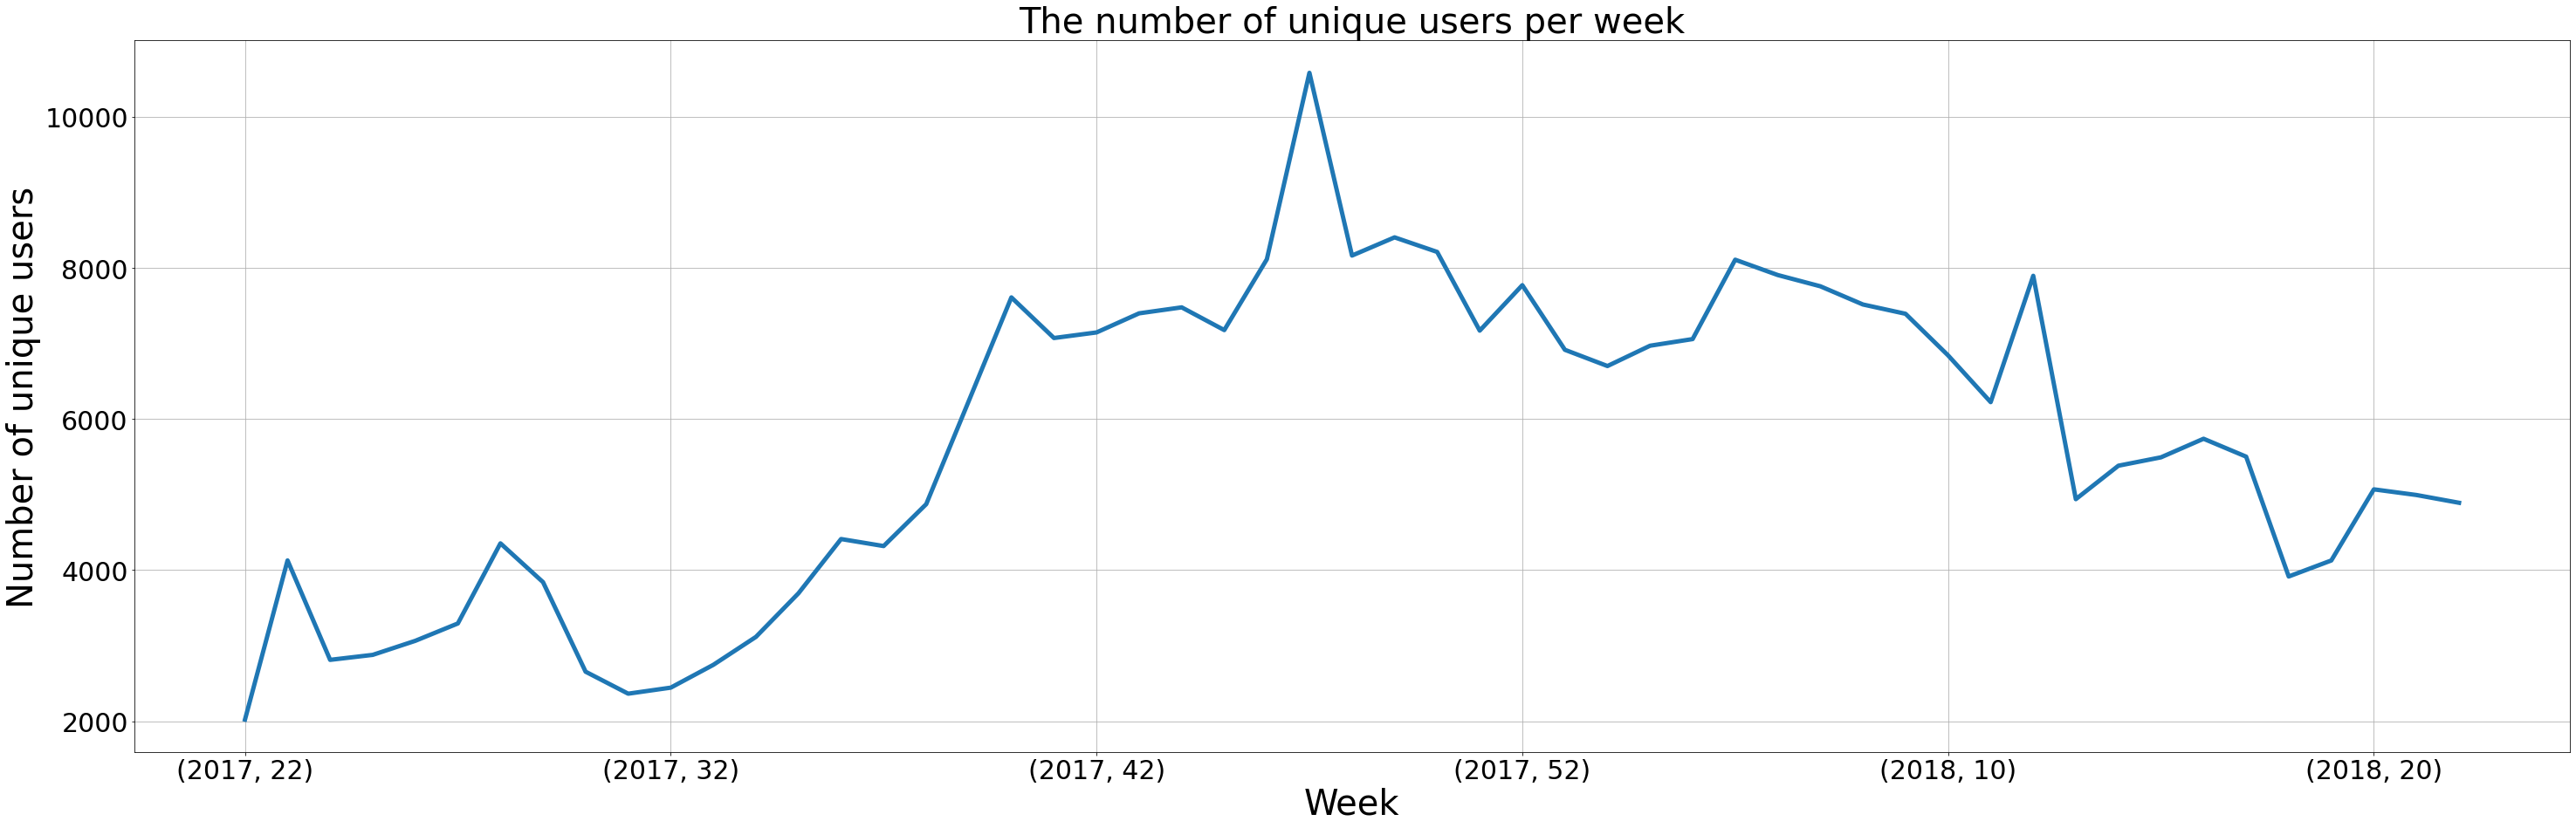

In [27]:
ax = wau.plot(grid = True, figsize = (50,15), linewidth=5, legend = False, fontsize=30)
ax.set_xlabel("Week", fontsize=40)
ax.set_ylabel("Number of unique users", fontsize=40)
ax.set_title("The number of unique users per week", fontsize=40)

Text(0.5, 1.0, 'The number of unique users per month')

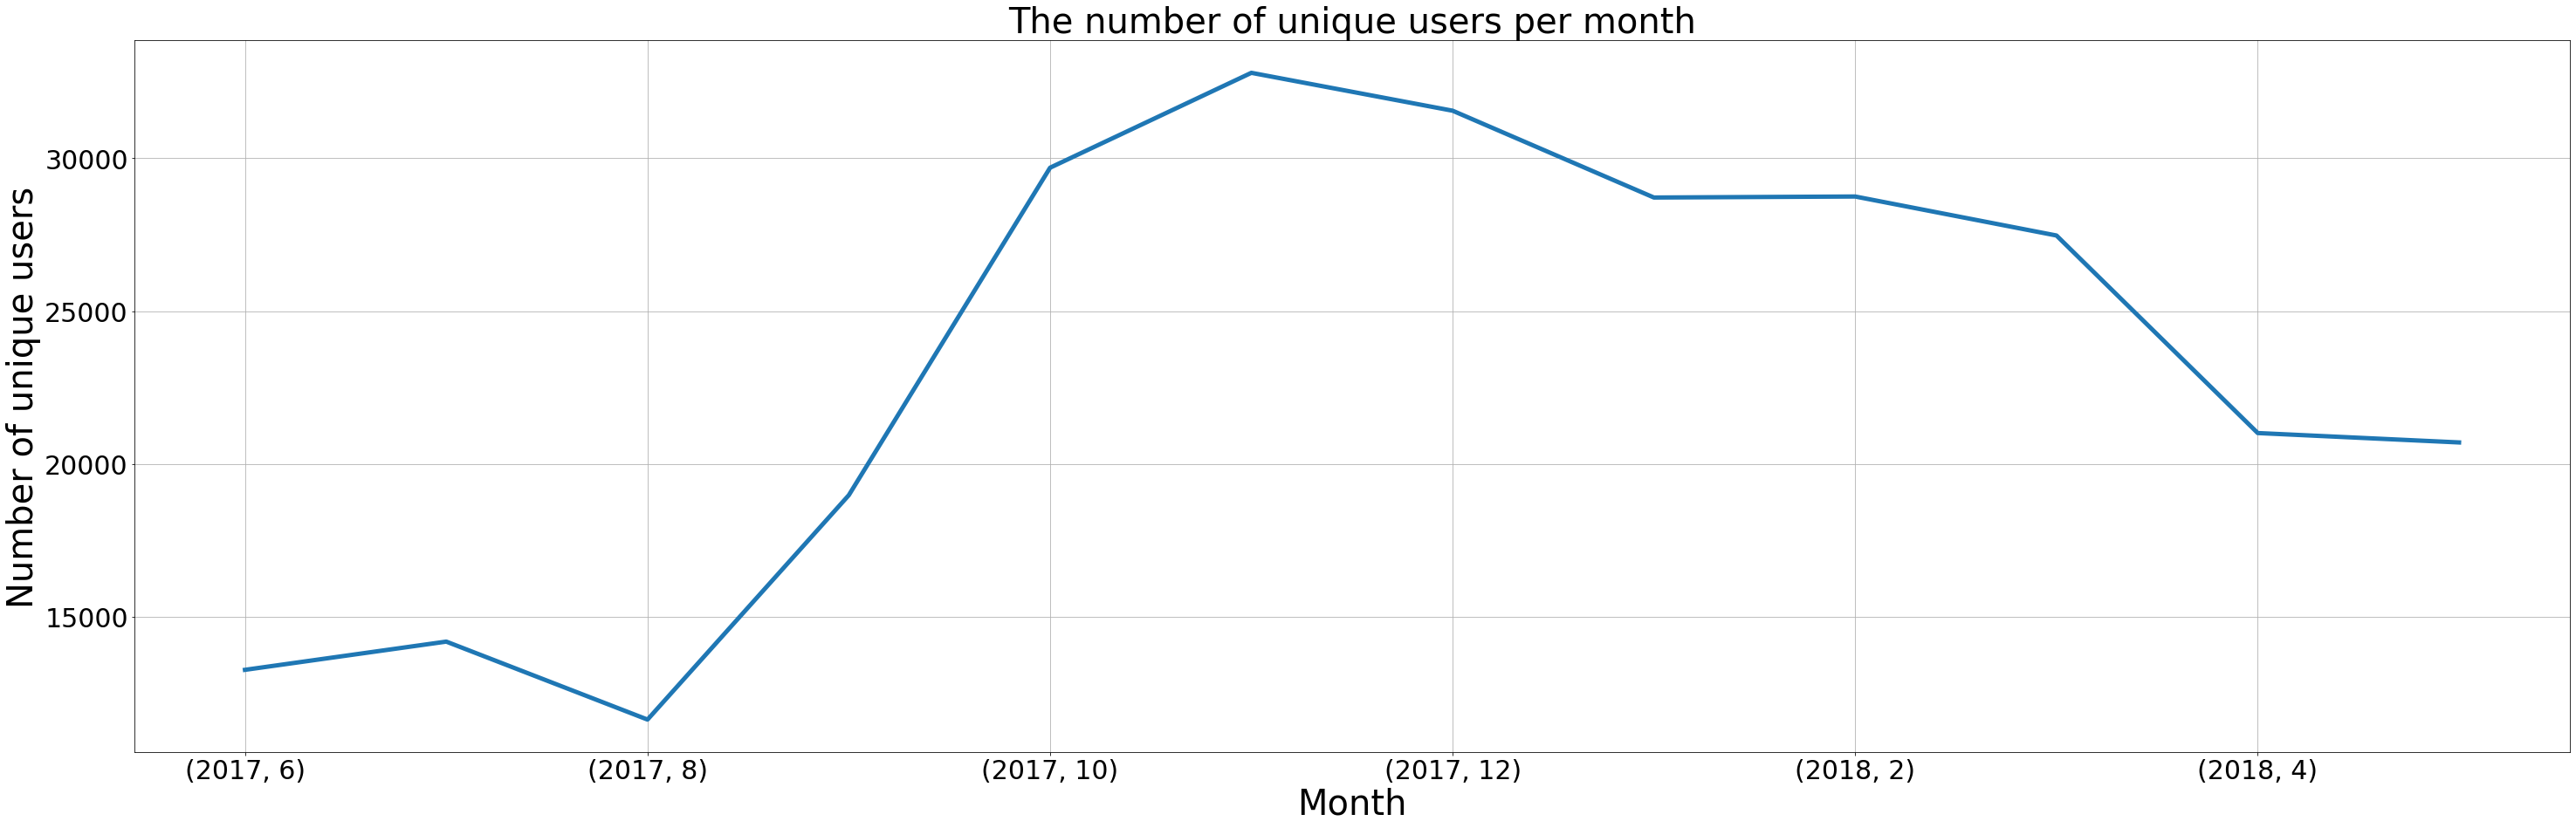

In [28]:
ax = mau.plot(grid = True, figsize = (50,15), linewidth=5, legend = False, fontsize=30)
ax.set_xlabel("Month", fontsize=40)
ax.set_ylabel("Number of unique users", fontsize=40)
ax.set_title("The number of unique users per month", fontsize=40)

The graphs show the dynamics of how many users visited the Yandex.Afisha website. On the DAU chart, one peak stands out strongly, which corresponds to "Black Friday". In general, users visit the site less in the summer months, after which there is an active growth, and the peak of attendance is reached in October-November, after which there is a slow decrease in attendance in the spring.

Calculating sticky factor

In [29]:
sticky_wau = dau_total/wau_total * 100
sticky_mau = dau_total/mau_total *100

In [30]:
print('Sticky_wau', sticky_wau)
print('Sticky_mau', sticky_mau)

Sticky_wau uid    15.884409
dtype: float64
Sticky_mau uid    3.90897
dtype: float64


#### Determine how many times per day users visit the site on average. Building a graph showing metric changes over time;

In [31]:
sessions_per_user = visits.groupby('visit_day').agg(
    {'uid' : ['count', 'nunique']})

sessions_per_user.columns =['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

In [32]:
sessions_per_user['sessions_per_user'] = sessions_per_user['sessions_per_user'].round(decimals=2)

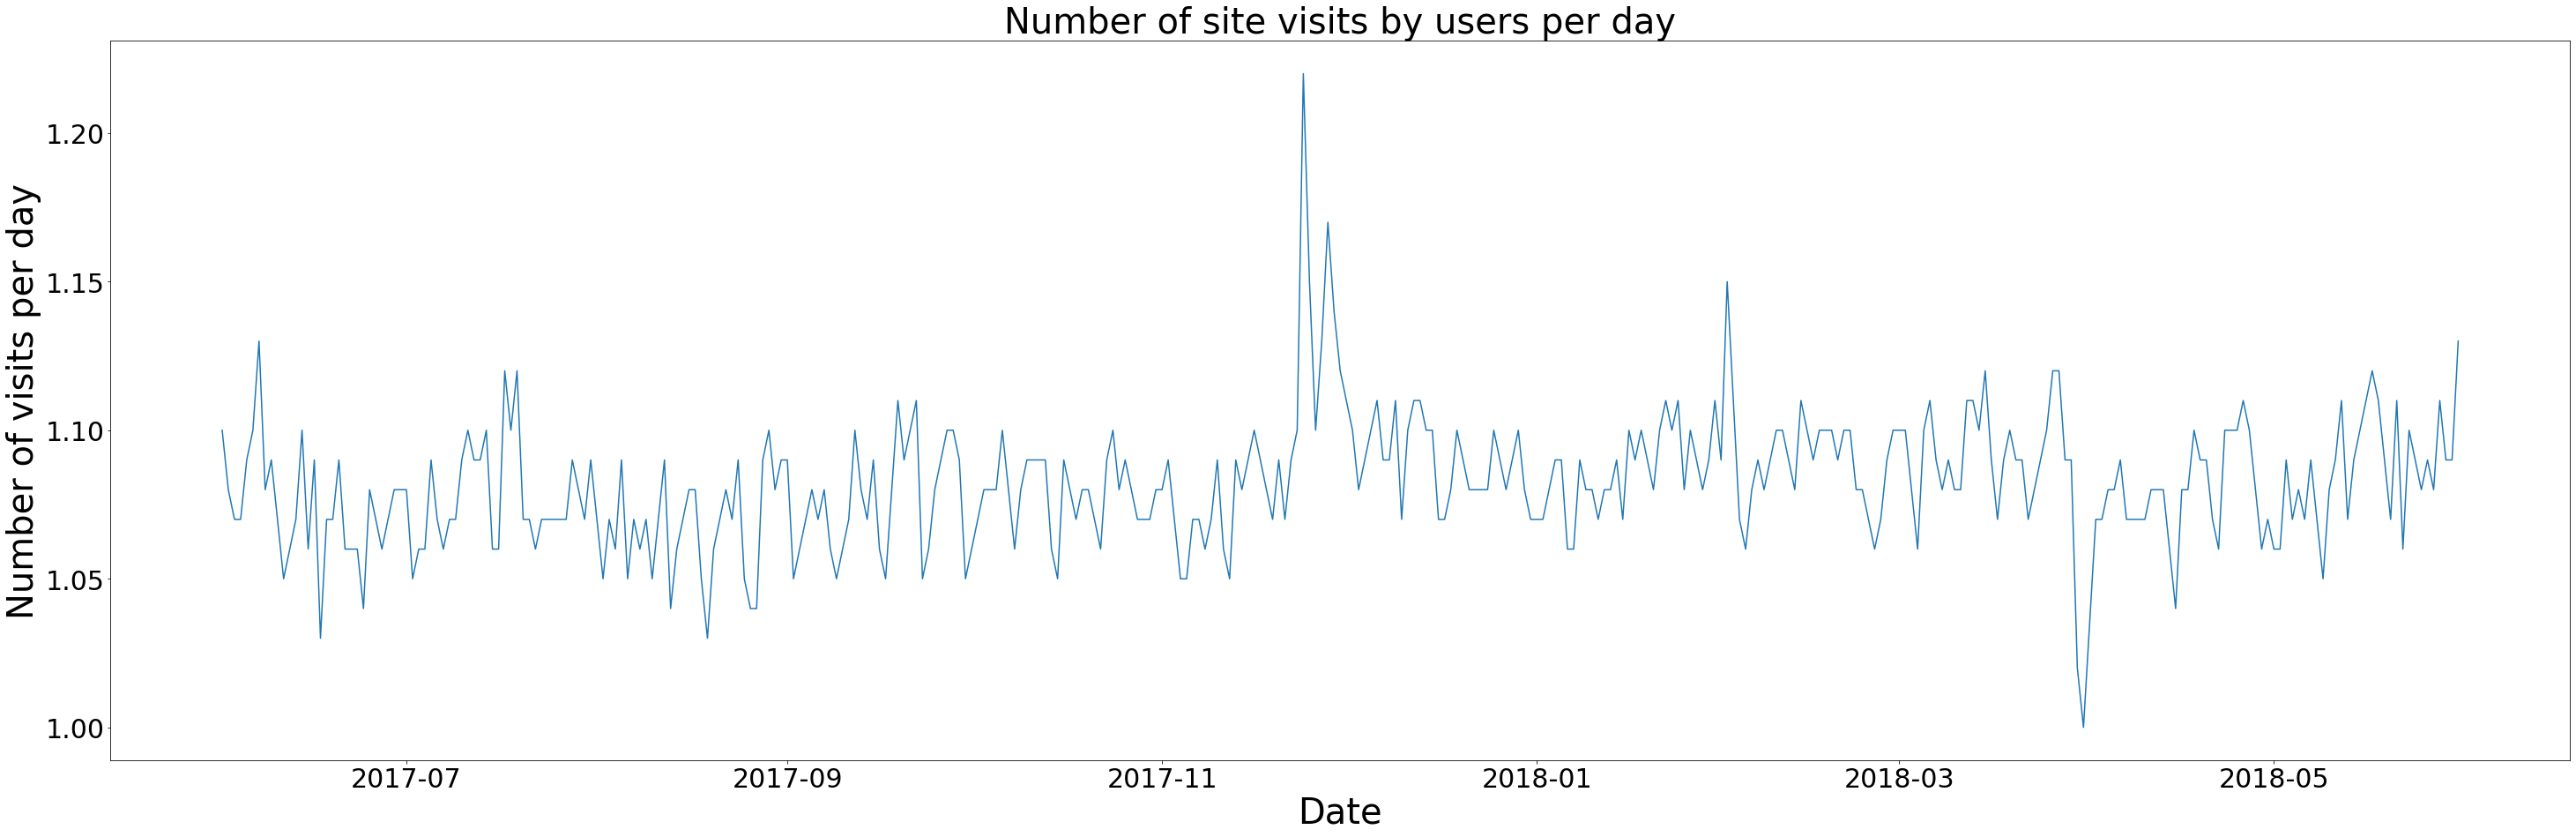

In [33]:
ax = sessions_per_user['sessions_per_user'].plot(figsize = (50,15), fontsize = 30)
ax.set_xlabel("Date", fontsize=40)
ax.set_ylabel("Number of visits per day", fontsize=40)
ax.set_title("Number of site visits by users per day", fontsize=40)
plt.show()

In [34]:
sessions_per_user['sessions_per_user'].mean()

1.0823901098901092

On average, people visit the site once a day, there is also a period of "Black Friday", when users visited the site much more often

- Calculating how much time users spend on the site;
- Find out the duration of a typical user session over the entire period;
- Plotting a distribution graph to select a suitable average measure. 

In [35]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

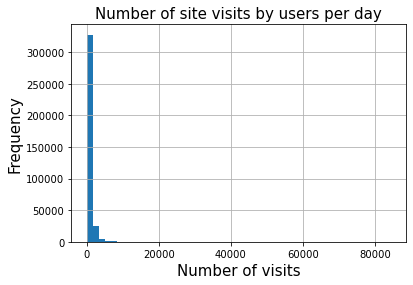

In [36]:
ax = visits['session_duration'].hist(bins = 50)
ax.set_xlabel("Number of visits", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_title("Number of site visits by users per day", fontsize=15)
plt.show()

In [37]:
visits['session_duration'].mode()

0    60
dtype: int64

Since the distribution is not normally distributed, it is better to calculate the mode. Most often, people spend 60 seconds on a website.

- Calculating Retention Rate using cohort analysis;
- Showing metric changes over time on a graph;
- Finding the average Retention Rate for the second month of the “life” of the cohorts.

In [38]:
# the date when the user was first active on the website

first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'

In [39]:
#Combining the visits dataframe and Series first_activity_date by the 'uid' column:
visits = visits.join(first_activity_date, on='uid') 

In [40]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,session_duration,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00


In [41]:
#extract the months from the columns first_activity_date and date_ts
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')

In [42]:
#calculating the lifetime of the user within the cohort
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 

In [43]:
#grouping the data by cohort and lifetime
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

In [44]:
#find the initial number of users in the cohort
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]

In [45]:
initial_users_count

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [46]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [47]:
#combining the data by cohorts with the original number of users in the cohort
cohorts = cohorts.merge(initial_users_count, on='first_activity_month') 

In [48]:
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [49]:
#Retention Rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

In [50]:
cohorts = cohorts.query('cohort_lifetime != 0')
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 

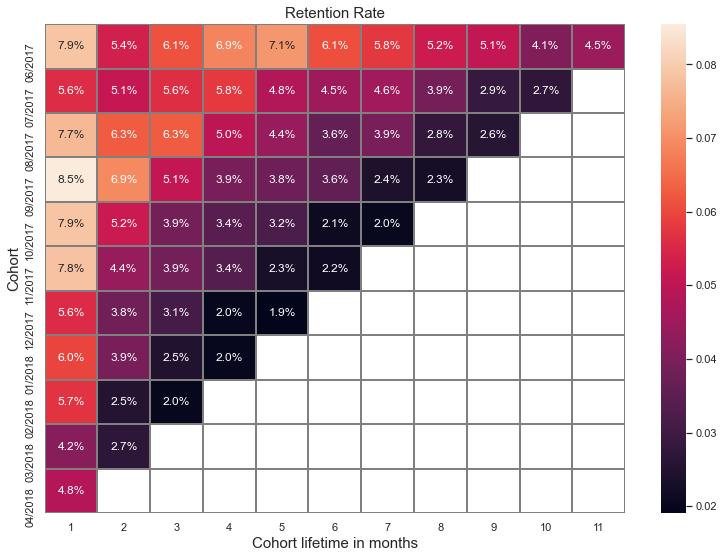

In [51]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")
plt.title('Retention Rate', fontsize=15)
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray') 
ax.set_xlabel("Cohort lifetime in months", fontsize=15)
ax.set_ylabel("Cohort", fontsize=15)
plt.show()

In [52]:
retention_pivot[1].mean()

0.06516659710392834

The retention rate is at a rather low level, which is most likely due to the specifics of the site, people generally visit the event ticketing website not every day as social networks, but when they are planning some activity. You can see that the cohorts from 2017-06-01 to 2017-11-01 behave similarly, then the Retention Rate falls for the cohorts 2017-11-01 to 2017-12-01 to 2018-04-01. Perhaps there have been some ineffective changes in the website. Or the metric was impacted by a sharp increase in users on Black Friday, which pushed the metric down.

- Investigating how long it takes on average from the first visit to the site to making a purchase

In [53]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'


visit_order_group = pd.merge(first_order_date, first_visit_date, on='uid').reset_index()

In [54]:
visit_order_group = visit_order_group.rename(columns = {'buy_ts':'first_order_date'})
visit_order_group['first_visit_date'] = visit_order_group['first_visit_date'].astype('datetime64[M]')

In [55]:
visit_order_group['time_to_order'] = visit_order_group['first_order_date'] - visit_order_group['first_visit_date']
visit_order_group['time_to_order'] = pd.to_timedelta(visit_order_group['time_to_order']) / np.timedelta64(1, 'D')

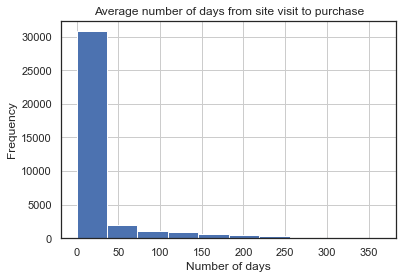

In [56]:
ax_visits = visit_order_group['time_to_order'].hist()
ax_visits.set_title('Average number of days from site visit to purchase')
ax_visits.set_xlabel('Number of days')
ax_visits.set_ylabel('Frequency')
plt.show()

As we can see from the graph, the values are strongly shifted to the left, the values are not normally distributed, which means that it is better to choose the median to assess the central trend.

In [57]:
visit_order_group['time_to_order'].median()

19.738888888888887

On average, people make a purchase within 20 days of their first visit.

- Сalculating the average number of purchases per customer over 6 months. 

In [58]:
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month'] 

In [59]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [60]:
orders_new = pd.merge(orders,first_orders, on='uid')

In [61]:
cohorts = (
    orders_new.groupby(['first_order_month', 'month'])
    .agg({'revenue': 'count'})
    .reset_index()
)
print(cohorts.head())

  first_order_month      month  revenue
0        2017-06-01 2017-06-01     2354
1        2017-06-01 2017-07-01      177
2        2017-06-01 2017-08-01      174
3        2017-06-01 2017-09-01      226
4        2017-06-01 2017-10-01      292


In [62]:
purchase = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(purchase.head())

  first_order_month  n_buyers      month  revenue
0        2017-06-01      2023 2017-06-01     2354
1        2017-06-01      2023 2017-07-01      177
2        2017-06-01      2023 2017-08-01      174
3        2017-06-01      2023 2017-09-01      226
4        2017-06-01      2023 2017-10-01      292


In [63]:
purchase['age'] = (
    purchase['month'] - purchase['first_order_month']
) / np.timedelta64(1, 'M')
purchase['age'] = purchase['age'].round().astype('int')

In [64]:
purchase['order_per_user'] = purchase['revenue'] / purchase['n_buyers']

output = purchase.pivot_table(
    index='first_order_month', columns='age', values='order_per_user', aggfunc='mean'
).cumsum(axis = 1)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.25111,1.33712,1.44884,1.59318,1.70094,1.83737,1.92338,2.02818,2.10381,2.15126,2.19377
2017-07-01,1.136765,1.18877,1.25117,1.30525,1.34269,1.38534,1.41706,1.44306,1.47322,1.4857,1.51326,
2017-08-01,1.118978,1.19781,1.2708,1.32993,1.39197,1.43723,1.47299,1.52993,1.5635,1.59708,,
2017-09-01,1.136381,1.22123,1.28361,1.34715,1.37311,1.41534,1.45719,1.47888,1.50252,,,
2017-10-01,1.143779,1.21613,1.25346,1.28157,1.31129,1.33502,1.35484,1.38364,,,,
2017-11-01,1.179368,1.27665,1.32124,1.37295,1.40627,1.42073,1.44572,,,,,
2017-12-01,1.152635,1.21424,1.26032,1.30116,1.32078,1.34474,,,,,,
2018-01-01,1.121554,1.18796,1.2351,1.25408,1.2772,,,,,,,
2018-02-01,1.121611,1.18242,1.20515,1.22432,,,,,,,,


In [65]:
round(output[5].mean(), 2)

1.43

The result shows that the average number of purchases per person increases over time across all cohorts. That is, despite the fact that every month the cohort loses a certain number of people, those who remain make purchases more often. Average number of purchases per customer over 6 months - 1.43

- Calculating the average bill by grouping by time of purchase

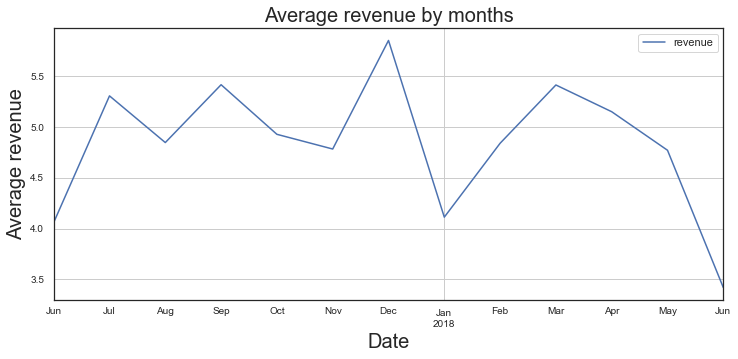

In [66]:
ax = revenue_pivot = (orders.pivot_table(index = 'month', values = 'revenue', aggfunc = 'mean')
                      .plot(grid=True, figsize=(12, 5), fontsize=10)) 
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Average revenue", fontsize=20)
ax.set_title("Average revenue by months", fontsize=20)
plt.show()

In [67]:
revenue_pivot = orders.pivot_table(index = 'month', values = 'revenue', aggfunc = 'mean')
print(revenue_pivot)

             revenue
month               
2017-06-01  4.060106
2017-07-01  5.306589
2017-08-01  4.847139
2017-09-01  5.416448
2017-10-01  4.928280
2017-11-01  4.783518
2017-12-01  5.852139
2018-01-01  4.112927
2018-02-01  4.840095
2018-03-01  5.413930
2018-04-01  5.150645
2018-05-01  4.771279
2018-06-01  3.420000


In [68]:
round(orders['revenue'].mean(), 2)

5.0

The average check ranges from 4 to 5.8, the highest average check was recorded in December, which is possibly related to the New Year holidays. The lowest check is in June, which generally confirms the downward trend in activity in summer. Also, the average check was lower in January, which is expected, since people usually spend less after the New Years.
The average check for the entire time was 5.

- Calculating how LTV per customer changes by cohort

In [69]:
first_orders = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']  

In [70]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [71]:
orders_new = pd.merge(orders,first_orders, on='uid')

In [72]:
cohorts = (
    orders_new.groupby(['first_order_month', 'month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
print(cohorts.head())

  first_order_month      month  revenue
0        2017-06-01 2017-06-01  9557.49
1        2017-06-01 2017-07-01   981.82
2        2017-06-01 2017-08-01   885.34
3        2017-06-01 2017-09-01  1931.30
4        2017-06-01 2017-10-01  2068.58


In [73]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(report.head()) 

  first_order_month  n_buyers      month  revenue
0        2017-06-01      2023 2017-06-01  9557.49
1        2017-06-01      2023 2017-07-01   981.82
2        2017-06-01      2023 2017-08-01   885.34
3        2017-06-01      2023 2017-09-01  1931.30
4        2017-06-01      2023 2017-10-01  2068.58


In [74]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
print(report.head()) 

  first_order_month  n_buyers      month  revenue       gp  age
0        2017-06-01      2023 2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023 2017-07-01   981.82   981.82    1
2        2017-06-01      2023 2017-08-01   885.34   885.34    2
3        2017-06-01      2023 2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023 2017-10-01  2068.58  2068.58    4


In [75]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis = 1)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


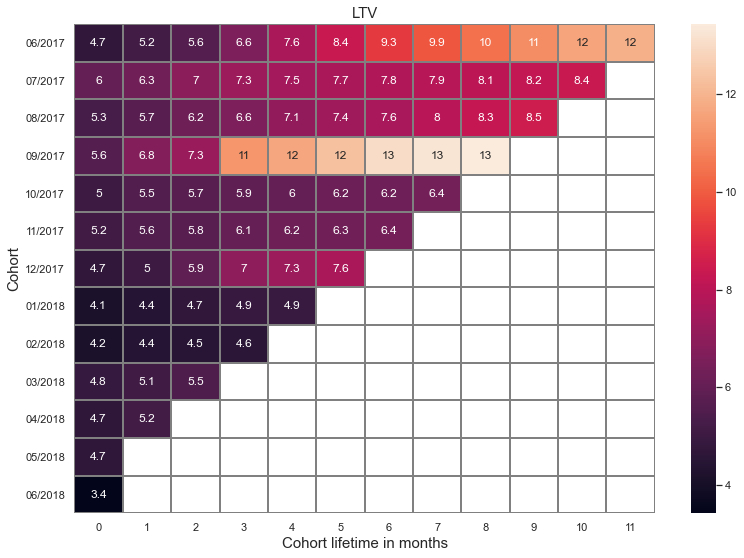

In [76]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV', fontsize=15)
output.index = output.index.strftime("%m/%Y")
ax = sns.heatmap(output, annot=True, linewidths=1, linecolor='gray') 
ax.set_xlabel("Cohort lifetime in months", fontsize=15)
ax.set_ylabel("Cohort", fontsize=15)
plt.show()

In [77]:
output = output.reset_index()

In [78]:
#average LTV over 6 months
output[5].mean()

7.969052630207336

- Identifying the traffic sources marketers should focus on

In [79]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [80]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [81]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Text(0.5, 1.0, 'Total Marketing Costs by Month')

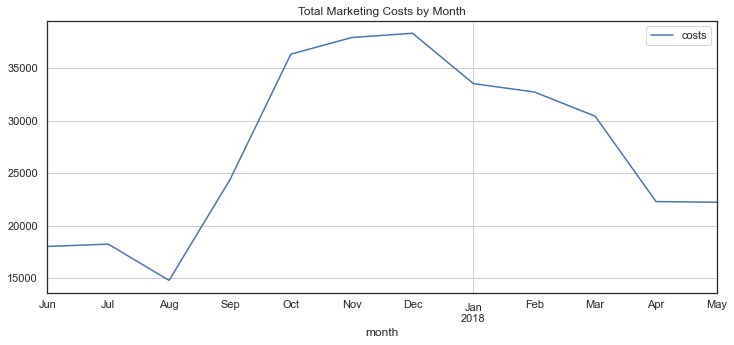

In [82]:
(costs.pivot_table(index = 'month', values = 'costs', aggfunc = 'sum')
                      .plot(grid=True, figsize=(12, 5)))
plt.title('Total Marketing Costs by Month')

Text(0.5, 1.0, 'Marketing costs by various sources')

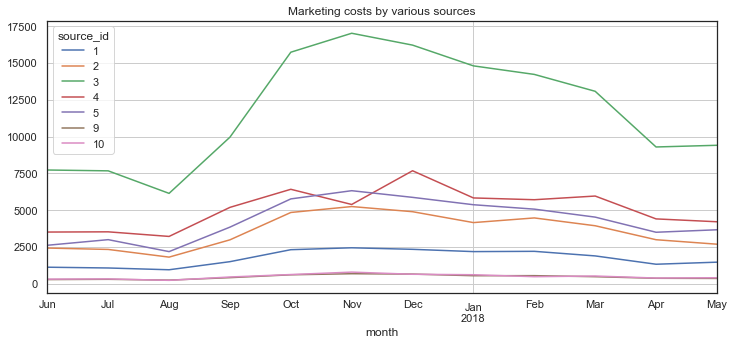

In [83]:
(costs.pivot_table(index = 'month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
                      .plot(grid=True, figsize=(12, 5)))
plt.title('Marketing costs by various sources')



In [84]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,session_duration,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


Text(0.5, 1.0, 'User traffic from various sources')

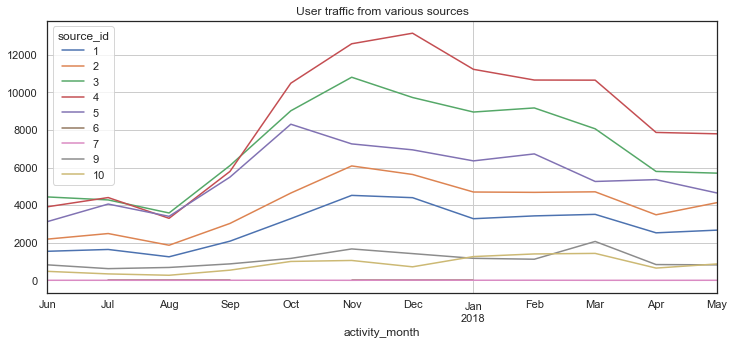

In [85]:
(visits.pivot_table(index = 'activity_month', columns = 'source_id', values = 'start_ts', aggfunc = 'count')
                      .plot(grid=True, figsize=(12, 5)))
plt.title('User traffic from various sources')

Most of the money is spent on source 3, while it also performs well in attracting users. The most effective agent was 4, while it ranks second in terms of spending on it. Marketers follow source 4, as it attracts the most users, while the source is cheaper than 3.

In general, marketing costs drop dramatically during the summer months.

- Calculating the average CAC per customer for the entire project and for each traffic source. 

In [86]:
uid_info = (visits.sort_values('start_ts', ascending = True)
            .groupby(['uid']).agg({'source_id' : 'first'}).reset_index())

In [87]:
orders = pd.merge(orders, uid_info, on='uid')

In [88]:
orders.head()

,buy_ts,revenue,uid,month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3


In [89]:
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'

orders = orders.join(first_order_date, on='uid') 

In [90]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [91]:
source_cohort_sizes = (orders.groupby(['source_id', 'first_order_month'])
                       .agg({'uid': 'nunique'}).reset_index())
source_cohort_sizes.columns = ['source_id', 'first_order_month', 'n_buyers']

In [92]:
cohorts_source = (orders.groupby(['source_id', 'first_order_month', 'order_month'])
                  .agg({'revenue': 'sum'}).reset_index())

In [93]:
final_report = source_cohort_sizes.merge(cohorts_source, 
                                         left_on = ['source_id', 'first_order_month'], 
                                         right_on = ['source_id', 'first_order_month'])

In [94]:
# calculating LTV
final_report['gp'] =  final_report['revenue'] * margin_rate
final_report['age'] = (final_report['order_month'] - final_report['first_order_month']) / np.timedelta64(1, 'M')
final_report['age'] = final_report['age'].round().astype('int')
final_report['ltv'] = final_report['gp'] / final_report['n_buyers']

In [95]:
monthly_costs = costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()

In [96]:
# calculating CAC
report_new = pd.merge(final_report, monthly_costs, 
                      left_on=['source_id', 'first_order_month'], 
                      right_on=['source_id', 'month'])
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [97]:
report_new

,source_id,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,costs,cac
0,1,2017-06-01,190,2017-06-01,1378.70,1378.70,0,7.256316,2017-06-01,1125.61,5.924263
1,1,2017-06-01,190,2017-07-01,414.98,414.98,1,2.184105,2017-06-01,1125.61,5.924263
2,1,2017-06-01,190,2017-08-01,419.43,419.43,2,2.207526,2017-06-01,1125.61,5.924263
3,1,2017-06-01,190,2017-09-01,714.24,714.24,3,3.759158,2017-06-01,1125.61,5.924263
4,1,2017-06-01,190,2017-10-01,811.20,811.20,4,4.269474,2017-06-01,1125.61,5.924263
...,...,...,...,...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,638.44,0,3.432473,2018-03-01,526.41,2.830161
510,10,2018-03-01,186,2018-04-01,12.71,12.71,1,0.068333,2018-03-01,526.41,2.830161
511,10,2018-03-01,186,2018-05-01,6.29,6.29,2,0.033817,2018-03-01,526.41,2.830161
512,10,2018-04-01,107,2018-04-01,261.93,261.93,0,2.447944,2018-04-01,388.25,3.628505


In [98]:
report_new['cac'].mean()

8.502155673125884

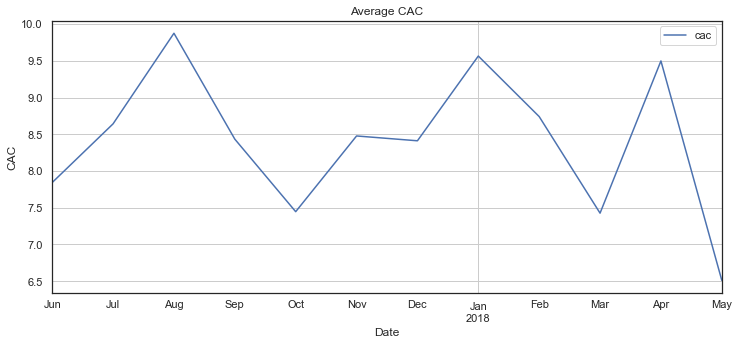

In [99]:
ax = (report_new.pivot_table(index = 'month', values = 'cac', aggfunc = 'mean')
.plot(grid=True, figsize=(12, 5)))
plt.title('Average CAC')
ax.set_xlabel('Date')
ax.set_ylabel('CAC')
plt.show()

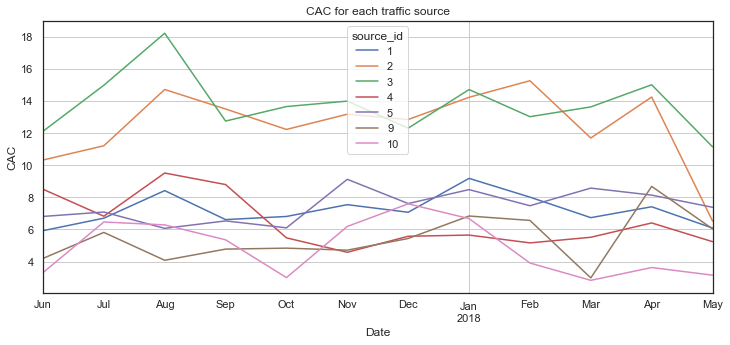

In [100]:
ax = (report_new.pivot_table(index = 'month', columns = 'source_id', values = 'cac', aggfunc = 'mean')
.plot(grid=True, figsize=(12, 5)))
plt.title('CAC for each traffic source')
ax.set_xlabel('Date')
ax.set_ylabel('CAC')
plt.show()


The highest cost of attracting a customer is for 3 and 2 sources, while for 3 sources it falls over time.

- Calculating the cohort ROMI by source. Comparing the ROI over the same cohort lifespan. 

In [101]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,session_duration,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [102]:
visits = visits.sort_values(by='start_ts')
first_source = visits.groupby('uid')['source_id'].first().reset_index()

In [103]:
first_source.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [104]:
orders_with_sources = orders.merge(first_source, on=['uid', 'source_id'])
 
customers_by_sources = (orders_with_sources
                        .groupby(['first_order_month', 'source_id'])
                        .agg({'uid': 'nunique'})
                        .reset_index())

In [105]:
orders_with_sources.head()

,buy_ts,revenue,uid,month,source_id,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [106]:
revenue_by_sources = (orders_with_sources
                      .groupby(['first_order_month', 'order_month', 'source_id'])
                      .agg({'revenue': 'sum'})
                      .reset_index())
 
 
report_for_ltv = revenue_by_sources.merge(customers_by_sources, on=['first_order_month', 'source_id'])

In [107]:
report_for_ltv['ltv'] = report_for_ltv['revenue'] / report_for_ltv['uid']

In [108]:
costs_for_cac = (costs
                 .groupby(['month', 'source_id'])
                 .agg({'costs': 'sum'})
                 .reset_index())
 
 
romi_report = costs_for_cac.merge(report_for_ltv, left_on=['month', 'source_id'], right_on=['order_month', 'source_id'])

In [109]:
romi_report['cac'] = romi_report['costs'] / romi_report['uid']
romi_report['romi'] = romi_report['ltv'] / romi_report['cac']

In [110]:
romi_report['age'] = pd.to_timedelta(romi_report['order_month'] - romi_report['first_order_month']) / np.timedelta64(1, 'M')
romi_report['age'] = romi_report['age'].round().astype('int')

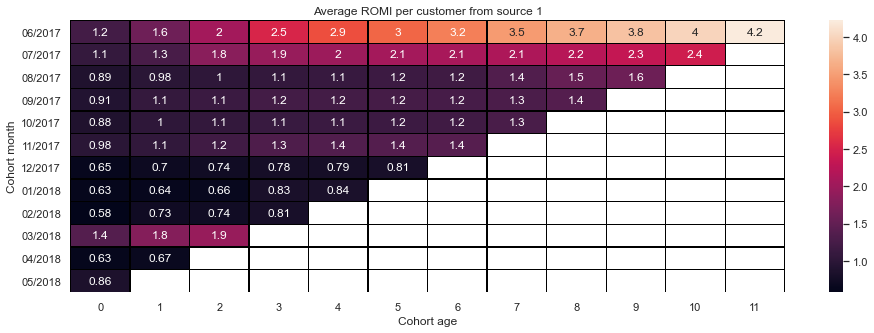

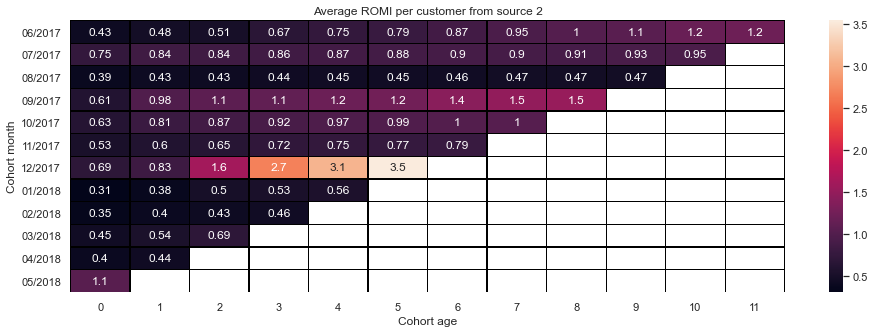

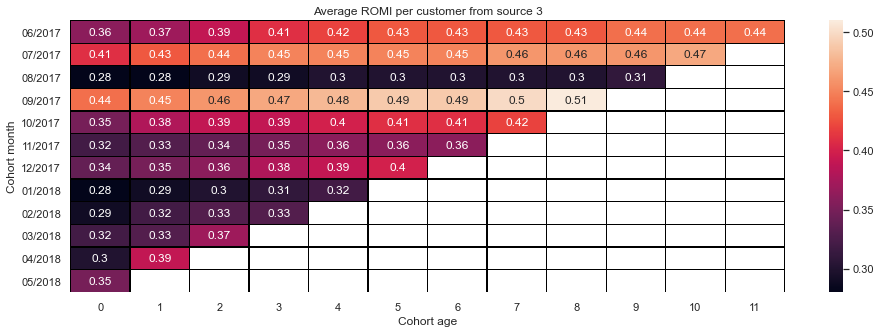

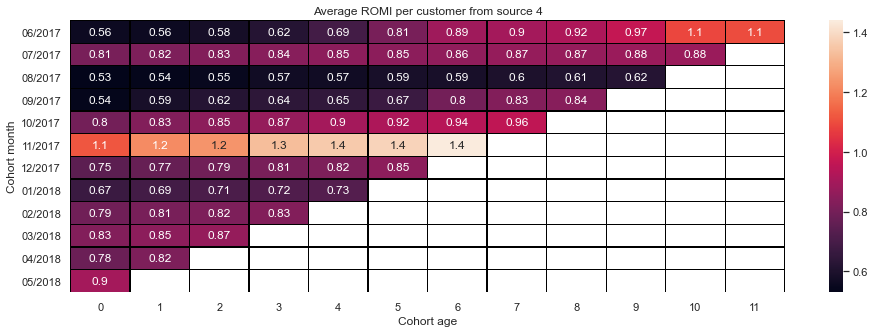

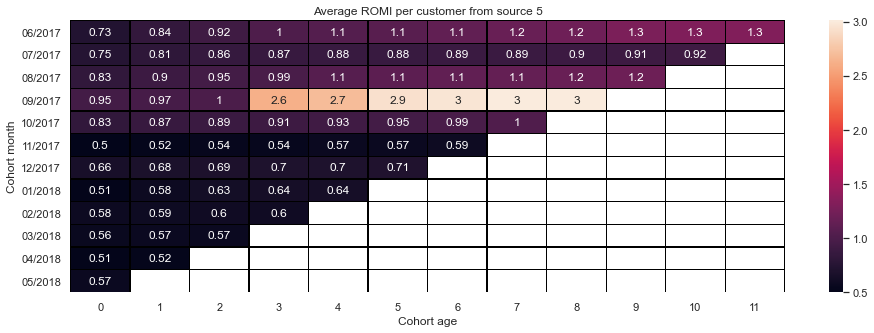

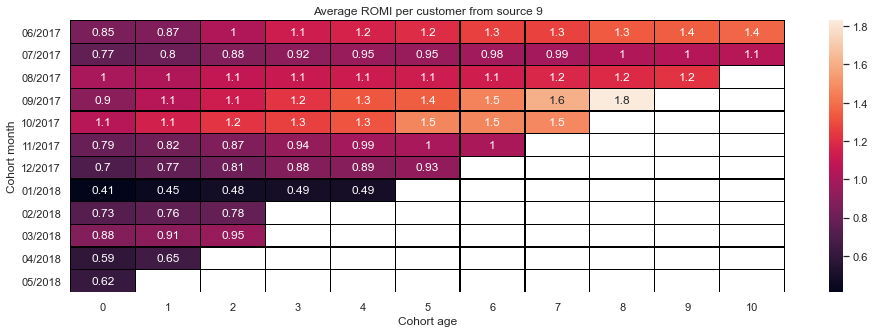

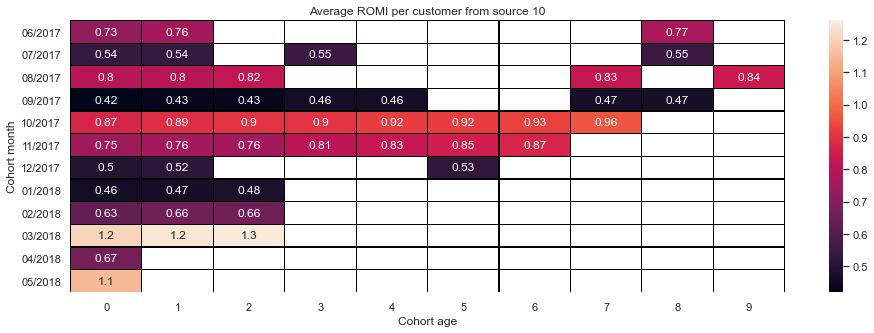

In [111]:
sources = romi_report['source_id'].unique()
 
for source in sources:
    plt.figure(figsize=(16, 5))
 
    romi_by_sources = (romi_report[romi_report['source_id'] == source]
              .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean'))
    romi_by_sources.index = romi_by_sources.index.strftime("%m/%Y")
 
    sns.heatmap(romi_by_sources.cumsum(axis=1).round(2), annot=True, linewidths=0.2, linecolor='black')
 
    plt.title('Average ROMI per customer from source {}'.format(source))
    plt.xlabel('Cohort age')
    plt.ylabel('Cohort month')

The first source pays off the best (from the first month for the first two cohorts)
On average, by 4-5 months of age, all cohorts have paid off or are close to it. The 5th source pays off most of all.

#### Conclusion
On average, a purchase on the website occurs on the day of the visit. On the day of Black Friday, both traffic and sales to the website skyrocket. On average, the activity is higher in the autumn-winter period; it reaches its maximum in December over the New Year holidays.
1 source pays off the fastest, source 5 and 9 also show good payback, which means it is worth continuing to focus on them.
Source 4 for the 11/2017 cohort paid off in the first month, which is most likely associated with Black Friday.
Source 5 has seriously worsened ROIs since the 11/2017 cohort, possibly something went wrong with the targeting setting.
At the same time, source 3 showed a very low return on investment in all cohorts, although it is in second place in terms of the number of attracted customers, it is much ahead of other sources in terms of costs. Perhaps it is worth giving up.